In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

In [183]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\tracks'

# List to store the individual DataFrames
dfs = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        #print(file_path)
        df = pd.read_csv(file_path, header = 2)
        df = df.drop(0)
        df.index = df.index -1    #Set the index rigth
        df = df.drop(columns='bodyparts')
        dfs.append(df)


C:\Users\raulo\AppData\Local\Temp\ipykernel_24800\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_24800\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_24800\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData

In [185]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\Labels'

# List to store the individual DataFrames
dfs_labels = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df = df.drop(columns='Unnamed: 0')
        #print(file_path)
        dfs_labels.append(df)

In [187]:
dfs_labels_single = []
for df in dfs_labels:
    # Convert DataFrame into a single-column DataFrame
    single_column_df = pd.DataFrame(df.idxmax(axis=1), columns=['Interaction'])
    dfs_labels_single.append(single_column_df)

In [188]:
# Create a list to store the labeled DataFrames
labeled_dfs = []

# Iterate over the DataFrames
for i in range(len(dfs)):
    # Add the labels DataFrame in front of each DataFrame
    labeled_df = pd.concat([dfs_labels_single[i], dfs[i]], axis=1)
    labeled_dfs.append(labeled_df)

# Concatenate the labeled DataFrames vertically
merged_df = pd.concat(labeled_dfs, ignore_index=True)

# Print the merged DataFrame
#print(merged_df)

In [141]:
interaction_counts = merged_df['Interaction'].value_counts()
print(interaction_counts)

background     594156
Int_Client       5524
TS               1474
Int_Cleaner       955
Jolt              490
Run               145
Name: Interaction, dtype: int64


In [190]:
background_df = merged_df[merged_df['Interaction'] == 'background']
other_df = merged_df[merged_df['Interaction'] != 'background']

In [237]:
# Set the number of subsequent rows to include
num_subsequent_rows = 10

# Randomly select num_random_rows rows
random_rows = background_df.sample(500, random_state=1999)

# Create a list to store the selected rows and subsequent rows
selected_rows = []

# Iterate over the randomly selected rows
for index, row in random_rows.iterrows():
    # Get the index range for subsequent rows
    start_index = index
    end_index = index + num_subsequent_rows

    # Extract the subsequent rows
    subsequent_rows = background_df.iloc[start_index:end_index]

    # Combine the selected row with subsequent rows
    combined_rows = pd.concat([subsequent_rows])

    # Append the combined rows to the list
    selected_rows.append(combined_rows)

# Create a DataFrame from the selected rows and subsequent rows
selected_df = pd.concat(selected_rows)

# Reset the index of the DataFrame
selected_df = selected_df.reset_index(drop=True)

In [239]:
undersampled_df = pd.concat([selected_df, other_df], ignore_index=True)

In [240]:
columns = [0, 1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [241]:
data = undersampled_df.iloc[:, columns]

In [242]:
data

,Interaction,Client_Mouth,Client_Mouth.1,Client_Spine_head,Client_Spine_head.1,Client_Spine_tail,Client_Spine_tail.1,Client_Body_top1,Client_Body_top1.1,Client_Body_top2,...,Client_Tail_Bot,Client_Tail_Bot.1,Cleaner_Mouth,Cleaner_Mouth.1,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Tail,Cleaner_Tail.1
0,background,1636.789,1148.628,1691.084,1130.375,1754.898,1116.074,1658.509,1064.729,1770.941,...,1854.883,1125.069,2177.339,1277.711,2114.345,1244.934,2019.637,1219.868,1925.102,1204.553
1,background,1636.226,1148.438,1690.997,1130.621,1754.592,1116.064,1655.511,1065.624,1770.934,...,1853.877,1126.136,2170.972,1277.144,2115.185,1245.155,2020.695,1220.061,1932.331,1205.992
2,background,1635.857,1148.554,1690.728,1129.874,1754.609,1116.416,1653.292,1065.221,1770.796,...,1853.628,1127.601,2179.007,1277.35,2116.336,1245.316,2028.805,1221.458,1939.929,1213.48
3,background,1620.926,1147.131,1686.814,1127.653,1751.734,1116.85,1652.673,1064.825,1770.728,...,1844.531,1127.24,2180.701,1280.677,2123.517,1252.237,2028.735,1221.589,1947.936,1205.329
4,background,1617.219,1147.924,1685.584,1128.778,1750.645,1116.972,1650.509,1065.213,1770.68,...,1844.692,1127.32,2181.173,1281.991,2123.494,1251.989,2035.281,1222.26,1957.373,1202.862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13473,Jolt,1557.674,918.542,1542.004,900.728,1548.275,868.249,1547.009,869.537,1547.285,...,1593.798,854.292,1558.641,747.849,1595.254,756.439,1628.689,773.326,1650.218,812.151
13474,Jolt,1565.732,934.123,1546.351,906.044,1540.71,866.378,1555.752,875.219,1547.713,...,1589.491,855.579,1556.383,748.643,1595.365,754.434,1628.539,770.899,1650.493,806.868
13475,Jolt,1570.706,934.959,1546.797,907.055,1540.73,867.614,1563.867,874.172,1543.43,...,1585.573,859.009,1551.276,749.034,1596.195,748.048,1628.661,769.174,1651.87,801.183
13476,Jolt,1573.439,933.519,1547.071,907.504,1538.589,868.541,1563.724,873.883,1542.887,...,1583.602,859.481,1551.696,751.819,1596.19,748.089,1628.663,768.311,1649.356,796.923


In [243]:
from collections import Counter

# Set the window size
window_size = 10

# Create a list to store the flattened and merged data
merged_data = []

# Iterate over the data in window size
for i in range(0, data.shape[0], window_size):
    # Extract the window of rows
    window_df = data.iloc[i:i+window_size]

    # Extract the interactions within the window
    window_interactions = window_df['Interaction']

    # Check if all interactions within the window are NaN
    if window_interactions.isnull().all():
        # Assign a default interaction when all interactions are NaN
        window_interaction = 'Unknown'
    else:
        # Perform majority voting to assign the interaction for the window
        interaction_counts = Counter(window_interactions)
        window_interaction = interaction_counts.most_common(1)[0][0]

    # Flatten the window data and append the interaction as the first element
    flattened_data = window_df.iloc[:, 1:].values.flatten().tolist()
    flattened_data.insert(0, window_interaction)

    # Append the flattened and merged data to the list
    merged_data.append(flattened_data)

# Convert the merged data into a DataFrame
merged_df = pd.DataFrame(merged_data)

# Output the merged DataFrame
#print(merged_df)

In [244]:
merged_df

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,background,1636.789,1148.628,1691.084,1130.375,1754.898,1116.074,1658.509,1064.729,1770.941,...,1836.513,1130.924,2197.013,1293.408,2139.213,1253.842,2051.0,1228.599,1969.432,1205.398
1,background,1073.888,803.183,1099.373,760.174,1116.458,726.29,1068.276,725.877,1089.335,...,948.469,668.487,955.526,610.982,948.403,643.886,955.937,675.631,929.646,725.852
2,background,1759.19,890.339,1787.237,842.834,1811.168,812.603,1763.159,802.842,1787.445,...,1836.055,772.55,1323.0,781.765,1306.553,804.723,1276.455,815.598,1228.073,817.194
3,background,1091.775,911.854,1125.939,906.217,1160.105,900.933,1114.262,856.249,1171.984,...,1213.952,933.952,1099.642,930.248,1083.619,948.147,1067.891,978.321,1083.733,1009.688
4,background,1836.026,950.068,1872.476,918.354,1907.469,890.417,1846.422,881.266,1899.525,...,1970.138,871.311,1828.116,780.956,1796.014,795.664,1747.821,795.408,1691.931,765.913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,Int_Client,1571.463,882.746,1610.164,845.372,1654.516,842.827,1579.642,822.527,1643.434,...,1715.71,841.305,1595.519,835.706,1602.99,868.06,1629.043,891.3,1660.873,923.601
1344,Int_Client,1564.917,875.66,1619.644,851.038,1659.887,845.428,1583.814,819.105,1643.206,...,1726.757,851.388,1595.773,835.728,1611.568,859.464,1635.862,891.379,1660.018,928.689
1345,Int_Client,1560.239,878.035,1610.443,845.253,1653.618,844.811,1579.436,814.945,1643.096,...,1705.137,843.31,1612.379,804.0,1621.4,849.291,1627.374,891.938,1645.096,917.486
1346,Jolt,1545.175,895.319,1572.972,867.809,1627.678,844.678,1538.728,834.578,1597.378,...,1615.455,851.981,1567.874,750.575,1606.061,770.418,1635.59,798.728,1644.095,837.975


In [246]:
shuffled_df = merged_df.sample(frac=1, random_state=1999)

In [247]:
X = shuffled_df.iloc[:, 1:281]
y = shuffled_df.iloc[:, 0]

In [248]:
imputer_knn = KNNImputer(n_neighbors=5, weights='uniform')

X_imputed = imputer_knn.fit_transform(X)

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=1999)

In [250]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [251]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8703703703703703


In [252]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm = confusion_matrix(y_test, y_pred)

#print(cm)

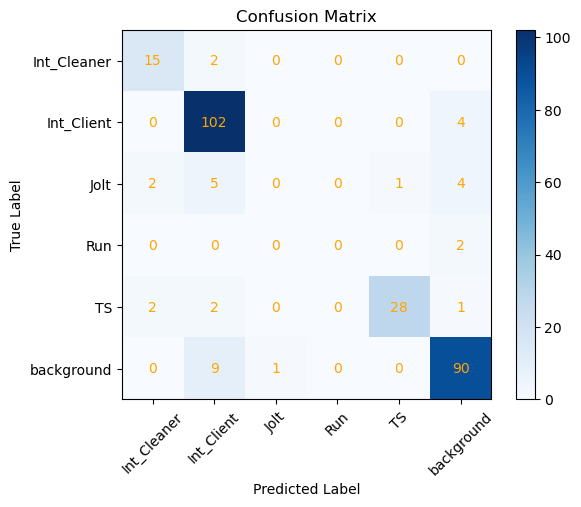

In [253]:
# Define the class labels
class_labels = np.sort(data['Interaction'].unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

## Testing with lab

In [254]:
df = pd.read_csv(r"C:\Users\raulo\Desktop\CódigoTese\test\LD10(T17)NR3_re-encDLC_dlcrnetms5_LD_YelFeb10shuffle1_75000_el_filtered.csv", header = 2)
df = df.drop(0)
df.index = df.index -1    #Set the index rigth
df = df.drop(columns='bodyparts')

C:\Users\raulo\AppData\Local\Temp\ipykernel_24800\39861810.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\raulo\Desktop\CódigoTese\test\LD10(T17)NR3_re-encDLC_dlcrnetms5_LD_YelFeb10shuffle1_75000_el_filtered.csv", header = 2)


In [255]:
df_label = pd.read_csv(r"C:\Users\raulo\Desktop\CódigoTese\test\LD10(T17)NR3_re-enc_labels.csv")
df_label = df_label.drop(columns='Unnamed: 0')

In [256]:
# Convert DataFrame into a single-column DataFrame
single_column_df = pd.DataFrame(df_label.idxmax(axis=1), columns=['Interaction'])

labeled_df = pd.concat([single_column_df, df], axis=1)

labeled_df

new_data = labeled_df.iloc[:, columns]

In [257]:
def merge_data_with_windows(data, window_size):
    # Create a list to store the flattened and merged data
    merged_data = []

    # Iterate over the data in window size
    for i in range(0, data.shape[0], window_size):
        # Extract the window of rows
        window_df = data.iloc[i:i+window_size]

        # Extract the interactions within the window
        window_interactions = window_df['Interaction']

        # Check if all interactions within the window are NaN
        if window_interactions.isnull().all():
            # Assign a default interaction when all interactions are NaN
            window_interaction = 'Unknown'
        else:
            # Perform majority voting to assign the interaction for the window
            interaction_counts = Counter(window_interactions)
            window_interaction = interaction_counts.most_common(1)[0][0]

        # Flatten the window data and append the interaction as the first element
        flattened_data = window_df.iloc[:, 1:].values.flatten().tolist()
        flattened_data.insert(0, window_interaction)

        # Append the flattened and merged data to the list
        merged_data.append(flattened_data)

    # Convert the merged data into a DataFrame
    merged_df = pd.DataFrame(merged_data)

    return merged_df

In [258]:
new_data = merge_data_with_windows(new_data, 10)

In [261]:
X = new_data.iloc[:, 1:281]  # Select columns 1 to 42 as features
y = new_data.iloc[:, 0]     # Select column 0 as the target variable

X_imputed = imputer_knn.fit_transform(X)


y_pred = model.predict(X_imputed)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9367088607594937


In [262]:
cm = confusion_matrix(y_true, y_pred)

In [263]:
cm

array([[   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0],
       [  38,  156,   13,   62, 3996]], dtype=int64)

In [41]:
###
####
###
####


In [218]:
# Set the window size
window_size = 10

# Create a list to store the flattened and merged data
merged_data1 = []

# Iterate over the data to create sequential windows
for i in range(data.shape[0] - window_size + 1):
    # Extract the window of rows
    window_df = data.iloc[i:i+window_size]

    # Extract the interactions within the window
    window_interactions = window_df['Interaction']

    # Check if all interactions within the window are NaN
    if window_interactions.isnull().all():
        # Assign a default interaction when all interactions are NaN
        window_interaction = 'Unknown'
    else:
        # Perform majority voting to assign the interaction for the window
        interaction_counts = Counter(window_interactions)
        window_interaction = interaction_counts.most_common(1)[0][0]

    # Flatten the window data and append the interaction as the first element
    flattened_data = window_df.iloc[:, 1:].values.flatten().tolist()
    flattened_data.insert(0, window_interaction)

    # Append the flattened and merged data to the list
    merged_data.append(flattened_data)

    # Adjust the starting index for the next window
    if (i+1) % window_size == 0:
        i += window_size - 1

# Convert the merged data into a DataFrame
merged_df1 = pd.DataFrame(merged_data)

In [221]:
data

,Interaction,Client_Mouth,Client_Mouth.1,Client_Spine_head,Client_Spine_head.1,Client_Spine_tail,Client_Spine_tail.1,Client_Body_top1,Client_Body_top1.1,Client_Body_top2,...,Client_Tail_Bot,Client_Tail_Bot.1,Cleaner_Mouth,Cleaner_Mouth.1,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Tail,Cleaner_Tail.1
0,background,1922.216,1131.771,1923.274,1107.492,1890.262,1075.134,1924.766,1053.561,1872.215,...,1805.987,1082.186,1194.133,885.194,1266.58,891.866,1324.836,908.538,1372.69,939.64
1,background,1173.446,685.651,1125.1,638.311,1068.936,609.681,1163.31,584.82,1067.497,...,983.075,600.868,865.209,796.943,821.67,780.43,770.806,765.171,726.15,757.911
2,background,1542.9,876.958,1521.66,845.795,1483.487,818.499,1543.14,812.313,1484.466,...,1420.526,802.721,803.689,348.472,748.299,341.141,709.394,373.014,684.49,411.305
3,background,1664.154,1012.948,1658.614,978.015,1684.045,961.843,1659.824,933.01,1672.576,...,1697.612,951.762,2083.709,483.408,2083.772,515.151,2067.807,557.481,2075.746,611.987
4,background,1542.252,972.999,1491.065,926.49,1427.622,892.563,1541.092,869.684,1451.395,...,1341.803,875.311,1371.705,434.867,1339.3,468.867,1298.898,499.964,1251.36,518.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,Jolt,1557.674,918.542,1542.004,900.728,1548.275,868.249,1547.009,869.537,1547.285,...,1593.798,854.292,1558.641,747.849,1595.254,756.439,1628.689,773.326,1650.218,812.151
13584,Jolt,1565.732,934.123,1546.351,906.044,1540.71,866.378,1555.752,875.219,1547.713,...,1589.491,855.579,1556.383,748.643,1595.365,754.434,1628.539,770.899,1650.493,806.868
13585,Jolt,1570.706,934.959,1546.797,907.055,1540.73,867.614,1563.867,874.172,1543.43,...,1585.573,859.009,1551.276,749.034,1596.195,748.048,1628.661,769.174,1651.87,801.183
13586,Jolt,1573.439,933.519,1547.071,907.504,1538.589,868.541,1563.724,873.883,1542.887,...,1583.602,859.481,1551.696,751.819,1596.19,748.089,1628.663,768.311,1649.356,796.923


In [220]:
merged_df1

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,background,1922.216,1131.771,1923.274,1107.492,1890.262,1075.134,1924.766,1053.561,1872.215,...,1196.081,691.581,1349.313,505.707,1291.812,492.378,1228.919,477.544,1170.362,475.814
1,background,1647.142,1007.6,1613.258,983.359,1570.527,966.401,1637.116,945.126,1573.655,...,1136.798,648.329,NaN,NaN,708.348,420.379,724.099,419.863,705.351,482.913
2,background,1616.818,1089.348,1683.926,1073.44,1739.888,1061.75,1659.523,1015.987,1749.486,...,892.075,649.063,1051.04,595.086,1094.861,610.788,1135.993,635.72,1163.946,645.997
3,background,1685.265,914.558,1661.405,899.769,1627.097,889.06,1660.049,845.443,1606.142,...,1291.445,731.488,1092.905,803.284,1035.99,812.606,972.775,822.244,913.494,833.901
4,background,2074.243,853.001,2011.198,804.646,1950.169,763.715,2066.124,746.149,1971.275,...,1871.701,920.683,1275.404,845.575,1243.664,836.234,1196.243,837.228,1153.686,845.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55670,Jolt,1547.703,909.679,1570.753,876.935,1595.785,853.092,1533.181,848.178,1559.109,...,1593.798,854.292,1558.641,747.849,1595.254,756.439,1628.689,773.326,1650.218,812.151
55671,Jolt,1547.365,911.902,1563.042,877.303,1588.726,851.258,1532.039,841.542,1563.549,...,1589.491,855.579,1556.383,748.643,1595.365,754.434,1628.539,770.899,1650.493,806.868
55672,Jolt,1546.964,911.404,1562.791,884.722,1580.935,853.837,1532.97,849.661,1563.456,...,1585.573,859.009,1551.276,749.034,1596.195,748.048,1628.661,769.174,1651.87,801.183
55673,Jolt,1548.071,914.728,1569.136,886.858,1581.152,860.122,1533.113,853.576,1563.317,...,1583.602,859.481,1551.696,751.819,1596.19,748.089,1628.663,768.311,1649.356,796.923


In [204]:
X1 = merged_df1.iloc[:, 1:281]
y1 = merged_df1.iloc[:, 0]

In [205]:
imputer_knn = KNNImputer(n_neighbors=5, weights='uniform')

X_imputed1 = imputer_knn.fit_transform(X1)

KeyboardInterrupt: 

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_imputed1, y1, test_size=0.2, random_state=1999)

In [ ]:
model1 = RandomForestClassifier()
model1.fit(X_train1, y_train1)

In [ ]:
y_pred1 = model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy1)

In [ ]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm1 = confusion_matrix(y_test1, y_pred1)

#print(cm)

In [ ]:
# Define the class labels
class_labels = np.sort(data['Interaction'].unique())

# Create the confusion matrix
cm = np.array(cm1)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

In [180]:
def merge_data_with_windows2(data, window_size):
    # Create a list to store the flattened and merged data
    merged_data = []

    # Iterate over the data to create sequential windows
    for i in range(data.shape[0] - window_size + 1):
        # Extract the window of rows
        window_df = data.iloc[i:i+window_size]

        # Extract the interactions within the window
        window_interactions = window_df['Interaction']

        # Check if all interactions within the window are NaN
        if window_interactions.isnull().all():
            # Assign a default interaction when all interactions are NaN
            window_interaction = 'Unknown'
        else:
            # Perform majority voting to assign the interaction for the window
            interaction_counts = Counter(window_interactions)
            window_interaction = interaction_counts.most_common(1)[0][0]

        # Flatten the window data and append the interaction as the first element
        flattened_data = window_df.iloc[:, 1:].values.flatten().tolist()
        flattened_data.insert(0, window_interaction)

        # Append the flattened and merged data to the list
        merged_data.append(flattened_data)

        # Adjust the starting index for the next window
        if (i+1) % window_size == 0:
            i += window_size - 1

    # Convert the merged data into a DataFrame
    merged_df = pd.DataFrame(merged_data)

    return merged_df